# Spring theory and Euler's method

Newton says that applying a force $\vec F$ to an object with mass $m$ will result in an acceleration $\vec a$

$$ \vec F = m \vec a $$

For a generalized spring the restoring force can be expanded in a Taylor series around a point $x_0$

$$ F = K(x) =  k_0 + k_1 (x-x_0) + k_2 (x-x_0)^2 + k_3 (x-x_0)^3 \ldots $$

where for convenience we can set $x_0=0$ to be the equilibrium point at which $k_0 = 0$

$$ K(x) \approx k_1 x + k_2 x^2 + k_3 x^3 \ldots $$

For a conservative force we can introduce a potential energy

$$ U(x) = - \int F dx \approx U_0 -\frac{1}{2} k_1 x^2 \ldots $$

which for very small values of $x$ can often be approximated by just the linear force term, or equivalently just the quadratic energy term if we set $U_0=0$.


For a linear spring the force balance

$$ \ddot x + \omega^2 x = 0 \qquad \omega = \sqrt{\frac{k}{m}} $$

has solutions of the form

$$ x = A \sin( \omega t + \phi ) $$

$$ v = \omega A \cos( \omega t + \phi ) $$

$$ a = -\omega^2 A \sin( \omega t + \phi ) $$

We can use numpy to calculate the displacement, velocity, and acceleration for any given time $t$.

In [1]:
import numpy as np

amplitude = 1.0
mass = 1.0
springk = 1.0
wfreq = np.sqrt( springk / mass )
phase0 = 0.001   # very crude way to avoid divide by zero (below)

#time = np.arange( 0.0, 5.0, 0.1 )   # start, stop, stepsize
time = np.linspace( 0.0, 5.0, 50 )  # start, stop, npoints

displacement = amplitude * np.sin( wfreq * time + phase0 )
velocity = wfreq * amplitude * np.cos( wfreq * time + phase0 )
acceleration = -wfreq**2 * amplitude * np.sin( wfreq * time + phase0)

Text(0.5,1,'Linear spring')

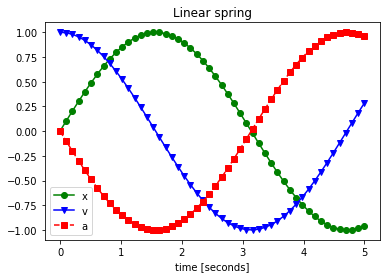

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot( time, displacement, 'go-', label = 'x' )
plt.plot( time, velocity, 'bv-', label = 'v' )
plt.plot( time, acceleration, 'rs--', label='a' )
plt.legend(loc=0)
plt.xlabel('time [seconds]')
plt.title('Linear spring')

## (Virtual) Reality checks

We have generated some "data" from the equations of motion.  If these were real observations, how could we analyze them to measure physical quantities of interest?

### frequency

The angular frequency $\omega$ for a perfect simple harmonic oscillator should depend on the ratio of mass to spring constant.

 $$\omega = \sqrt{k \over m}$$

Taking the ratio of $a$ to $x$ should in theory give us $-\omega^2$

 $${a \over x} = {{-\omega^2 A \sin(\omega t + \phi}\over{A \sin(\omega t + \phi)}} = -\omega^2$$


In practice there is the possibility of dividing by zero, but we will try to avoid that by offsetting the phase by some small value so that none of the times correspond exactly to $x=0$.

In [3]:
wfreq_obs = np.sqrt( -acceleration / displacement)

It is always a good idea to start by looking at a few of the numbers:

In [4]:
wfreq_obs[0:9]

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

If things look okay, then we could calculate some basic statistics eg. mean and standard deviation.  A quick plot is often useful (labels required!).

In [5]:
 np.mean(wfreq_obs), np.std(wfreq_obs) 

(1.0, 0.0)

Text(0,0.5,'angular frequency')

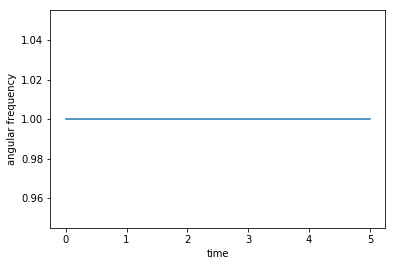

In [6]:
plt.plot(time, wfreq_obs)
plt.xlabel('time')
plt.ylabel('angular frequency')

### energy

If all the forces are conservative, then the total energy of the system should be constant

  $$ E = \frac{1}{2} m v^2 + \frac{1}{2} k x^2 $$

The plot below certainly looks like a straight line, but some more quantitative confirmation would be a good idea.

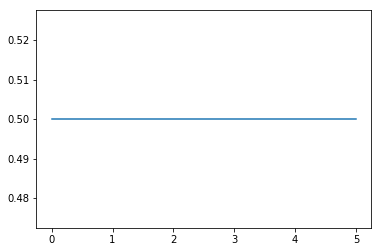

In [7]:
energy_obs = 0.5 * mass * velocity**2 + 0.5 * springk * displacement**2
plt.plot(time, energy_obs)

The differences between calculations and theory are all on the order of double precision round-off error.

In [8]:
dEnergy = energy_obs - 0.5
print( np.mean(dEnergy), np.std(dEnergy) )
print( np.max(dEnergy), np.min(dEnergy) )

-1.4432899320127036e-17 3.477320601100914e-17
1.1102230246251565e-16 -1.1102230246251565e-16


## Phase space

Text(0.5,1,'Spring phase space')

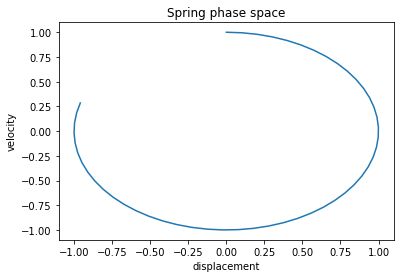

In [9]:
plt.plot( displacement, velocity)
plt.xlabel('displacement')
plt.ylabel('velocity')
plt.title('Spring phase space')

# Stepping with Euler

Imagine that we didn't know the closed form solution for the linear spring, or that we were dealing with some more complicated problem for which there was no simple solution.

We want to start with some set of initial conditions and try to predict what the system would look like at some time in the future.  As physicists, we might try taking evaluating the force and obtaining the instantaneous acceleration at $t_0=0$.  We could then estimate the new velocity at some later time $t_1$

$$ v(t_1) = v(t_0) + a(t_0) * (t_1 - t_0) $$

and finally determine the displacement

$$ x(t_1) = x(t_0) + v(t_1) * (t_1 - t_0) $$

In [10]:
# define mass and linear spring constant
m, k = 1.0, 1.0

# initial conditions: t=0, v,a=0, x=1
# use python lists for now
x,v,a,t = [1.0], [0.0], [0.0], [0.0]

# time step size
dt = 1.0e-2

# take almost a thousand steps, appending results to each list
for n in range(999):
    t.append(t[-1]+dt)    # step in time
    a.append(-k/m*x[-1])  # calculate acceleration
    v.append(v[-1] + a[-1]*dt) # calculate velocity
    x.append(x[-1] + v[-1]*dt) # calculate displacement

# numpy arrays are usually easier to work with than lists
x = np.array(x)
v = np.array(v)
a = np.array(a)
t = np.array(t)

Text(0.5,0,'time  [arbitrary units]')

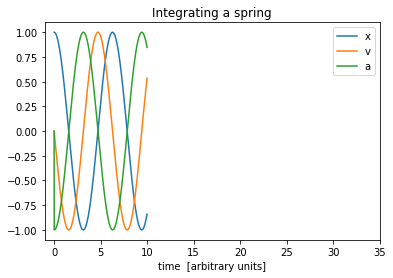

In [11]:
plt.xlim(-1,35)
plt.plot(t,x, label='x')
plt.plot(t,v, label='v')
plt.plot(t,a, label='a')
plt.legend(loc=0)
plt.title('Integrating a spring')
plt.xlabel('time  [arbitrary units]')

## Question \#1: Does the numerical solution using Euler's method conserve energy? Is the angular frequency correct?

## Question \#2: how does the peak error in energy depend on time step? 
ie. try $\Delta t = 1e-4, 1e-3, 1-e2 \ldots$, then tabulate and/or plot $\epsilon E$ versus $\Delta t$

largest deviation from E_0 = np.max( np.abs(E-E_0) )

## Question \#3: What happens to the peak error if we step using the old velocities?
$$ x(t_1) = x(t_0) + v(t_0) * (t_1 - t_0) $$

## Question \#4: What happens to the peak error if we step using the average of old and new velocities?
$$ x(t_1) = x(t_0) + \frac{1}{2}[ v(t_0) + v(t_1) ] * (t_1 - t_0) $$